In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image

In [13]:
model = VGG16(weights='imagenet',include_top=False)


In [14]:
img_path = 'image.jpg'
img = image.load_img(img_path,target_size=(224,224))


In [15]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array,axis=0)
img_array /= 255.0

In [16]:
layer_outputs = model.layers[1].output
feature_map_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)
feature_map = feature_map_model.predict(img_array)

1/1 [==============================] - 0s 142ms/step


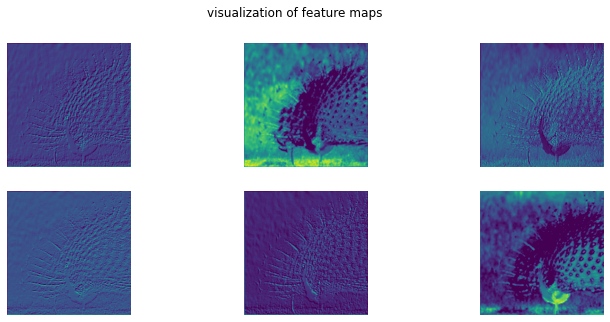

In [17]:
num_feature_maps = feature_map.shape[-1]
plt.figure(figsize=(12,5))

for i in range(min(6,num_feature_maps)):
    plt.subplot(2,3,i+1)
    plt.imshow(feature_map[0,:,:,i],cmap='viridis')
    plt.axis('off')

plt.suptitle('visualization of feature maps')
plt.show()

In [18]:
filters,biases = model.layers[1].get_weights()

In [19]:
filters = filters - filters.min()/(filters.max()-filters.min())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.039535493..1.0749452].


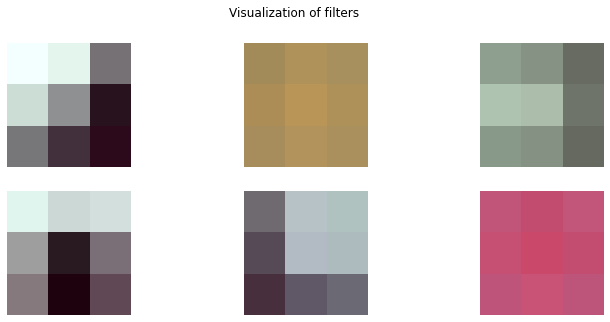

In [22]:
num_filters = filters.shape[3]
plt.figure(figsize=(12,5))
for i in range(min(6,num_filters)):
    plt.subplot(2,3,i+1)
    plt.imshow(filters[:,:,:,i],cmap='viridis')
    plt.axis('off')

plt.suptitle('Visualization of filters')
plt.show()